In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import nltk
import re
import pickle
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
Data=pd.read_csv('MovieGenre.csv')
Data

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


In [3]:
Data.drop('id',axis=1,inplace=True)
Data.rename(columns={'text':'Text','genre':'Genre'},inplace=True)

In [4]:
Data

,Text,Genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama
...,...,...
22574,n in the world to decide what I'm going to do ...,drama
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,....with marked skill and dexterity . LANA wry...,action


### DATA PREPROCESSING

In [5]:
# CHECKING NULL VALUES
Data.isnull().sum()

Text     0
Genre    0
dtype: int64

In [6]:
Data['Genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [7]:
Data['Genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: Genre, dtype: int64

In [8]:
Data['Genre'].value_counts(normalize=True)

drama        0.392976
thriller     0.302228
comedy       0.130254
action       0.105939
sci-fi       0.027149
horror       0.020196
other        0.011958
adventure    0.006510
romance      0.002790
Name: Genre, dtype: float64

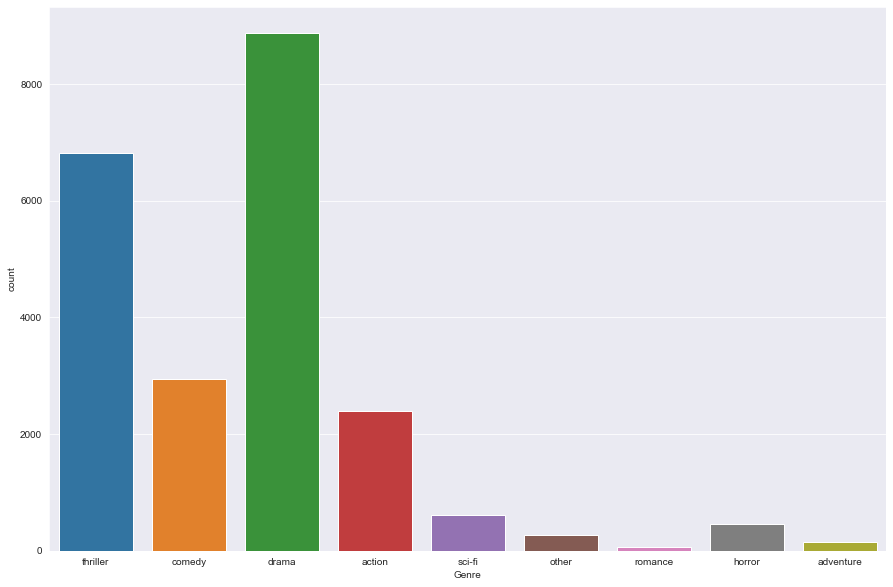

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(Data['Genre'])

In [10]:
Genre_Mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
Data['Genre'] = Data['Genre'].map(Genre_Mapper)

In [11]:
Corpus=[]

Stemmer=PorterStemmer()
Lemmatizer=WordNetLemmatizer()

In [12]:
for i in range(0,Data.shape[0]):
    Review=re.sub('[^a-zA-Z]',' ',Data['Text'][i])
    Review=Review.lower()
    Review=Review.split() 
    Review=[Lemmatizer.lemmatize(Word) for Word in Review if Word not in set(stopwords.words('english'))]
    Review=' '.join(Review)
    Corpus.append(Review)

In [13]:
Corpus[0:15]

['eady dead maybe even wishing int nd floor hallway three night orderly lead liza door orderly white guy open door step room three white guy mid look wild straight jacketed jerry liza reached end rope shake head int decrepit hospital room night balled fetal really head pressed cement try sing jerry blue moon blue moon int nd floor hallway three night liza stand leaning rail wall orderly sure going know bad orderly okay liza start hall orderly following orderly got new patient last week want see liza wave hopeless stop chicken wired window end hall look light break jerry somewhere orderly look gotta get back work',
 'summa cum laude launch brand new magazine called exposed homage miss julie conroy xenia ohio julie grin julie know find excellent editor chief ted yellow page julie let finger walking suddenly music change people ted grin ted playing song extending hand dare ask dance julie taking hand better ted julie begin dancing kissing b g charlie jimmy feign tear charlie sucker happy 

In [14]:
Data['Genre']

0        8
1        3
2        4
3        8
4        4
        ..
22574    4
22575    4
22576    8
22577    1
22578    3
Name: Genre, Length: 22579, dtype: int64

In [15]:
Data['Genre']==4

0        False
1        False
2         True
3        False
4         True
         ...  
22574     True
22575     True
22576    False
22577    False
22578    False
Name: Genre, Length: 22579, dtype: bool

In [16]:
# DRAMA
Data[Data['Genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [17]:
# THRILLER
Data[Data['Genre']==8].index

Int64Index([    0,     3,     5,     6,     8,    18,    24,    26,    31,
               34,
            ...
            22539, 22540, 22543, 22545, 22546, 22558, 22565, 22570, 22572,
            22576],
           dtype='int64', length=6824)

In [18]:
# COMEDY
Data[Data['Genre']==3].index

Int64Index([    1,    20,    25,    29,    30,    33,    39,    44,    54,
               73,
            ...
            22519, 22523, 22528, 22532, 22542, 22552, 22554, 22556, 22562,
            22578],
           dtype='int64', length=2941)

In [19]:
List=list(Data[Data['Genre']==4].index)
List

[2,
 4,
 7,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 21,
 22,
 23,
 27,
 28,
 37,
 40,
 41,
 42,
 46,
 47,
 50,
 51,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 68,
 69,
 70,
 71,
 75,
 82,
 95,
 97,
 98,
 99,
 105,
 107,
 109,
 111,
 115,
 116,
 123,
 125,
 128,
 134,
 136,
 138,
 140,
 144,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 157,
 160,
 163,
 164,
 167,
 168,
 172,
 174,
 175,
 178,
 181,
 183,
 186,
 187,
 188,
 189,
 190,
 193,
 194,
 196,
 204,
 205,
 207,
 210,
 212,
 214,
 215,
 216,
 221,
 222,
 223,
 224,
 225,
 228,
 229,
 230,
 237,
 240,
 242,
 243,
 245,
 247,
 248,
 252,
 255,
 257,
 259,
 264,
 265,
 266,
 267,
 270,
 273,
 274,
 276,
 278,
 280,
 282,
 283,
 284,
 286,
 289,
 291,
 292,
 293,
 297,
 301,
 303,
 305,
 306,
 310,
 314,
 315,
 317,
 319,
 321,
 326,
 327,
 330,
 332,
 334,
 336,
 337,
 338,
 339,
 341,
 342,
 343,
 348,
 349,
 350,
 354,
 357,
 360,
 362,
 366,
 367,
 368,
 369,
 371,
 374,
 375,
 377,
 379,
 380,
 383,
 384,
 387,
 393,
 402,
 

In [20]:
# DRAMA
Drama=[]
for i in list(Data[Data['Genre']==4].index):
    Drama.append(Corpus[i])

In [21]:
Drama[1]

'nd dismount child reach throw arm embracing charlotte hurry behind martin lock eye enveloped hug child ext fresh water plantation evening summer oak tree covered leaf martin house partially rebuilt habitable workshop already completed martin child nathan samuel margaret william play tall grass front house two great dane charlotte sits front porch nursing infant martin walk workshop trailed susan carry completed rocking chair chair work art thin light spider web perfectly turned wood nail glue step onto porch next charlotte place rocking chair next martin two pound fourteen ounce charlotte lovely smile make minute adjustment chair position sits settle back'

In [22]:
Drama_Word=''
for i in range(0,5):
    Drama_Word+=Drama[i]

In [23]:
Drama_Word

'come surprise take hand lead hallway salvatore look feel pang seems smaller age withers body slightly stooped hair gathered knot back head must tired want rest time funeral salvatore interrupting mamma take hour air know maria smiling ironically tell year salvatore get message feel guilty thinking seems incredible never come maria open door step aside let son whisper put thing go go salvatore lake step flabbergasted sight old room perfectly reconstructed preserved look like museum museum past despite bed clothes cupboard book shelf perfectly clear one ever livednd dismount child reach throw arm embracing charlotte hurry behind martin lock eye enveloped hug child ext fresh water plantation evening summer oak tree covered leaf martin house partially rebuilt habitable workshop already completed martin child nathan samuel margaret william play tall grass front house two great dane charlotte sits front porch nursing infant martin walk workshop trailed susan carry completed rocking chair ch

In [24]:
# ACTION
Action=[]
for i in list(Data[Data['Genre']==1].index):
    Action.append(Corpus[i])

Action_Word=''
for i in range(0,5):
    Action_Word+=Action[i]

In [25]:
Action_Word

'e reel world spin sweat pours pressure build inside skull brain put centrifuge neo believe believe cypher going pop vomiting violently neo pitch forward black int neo room blink regaining consciousness room dark neo stretched bed neo go back morpheus sitting like shadow chair far corner morpheus could would really want deep neo know answer morpheus feel owe apology rule free mind reach certain age dangerous trouble letting go mind turn seen happen broke rule stare darkness confessing much neo morpheus matrix first built man born inside ability change wanted remake matenter house int brownstone day continuous action woman greets lead expensively furnished house stantz business many woman fourteen back hope handle like nightmare winston big hold hand indicating four foot winston resolute best woman right lead set french door open another room stantz winston pause make final adjustment equipment stantz ready winston ready stantz let push french door step room int brownstone day continuou

In [26]:
# COMEDY
Comedy=[]
for i in list(Data[Data['Genre']==3].index):
    Comedy.append(Corpus[i])

Comedy_Word=''
for i in range(0,5):
    Comedy_Word+=Comedy[i]

In [27]:
Comedy_Word

'summa cum laude launch brand new magazine called exposed homage miss julie conroy xenia ohio julie grin julie know find excellent editor chief ted yellow page julie let finger walking suddenly music change people ted grin ted playing song extending hand dare ask dance julie taking hand better ted julie begin dancing kissing b g charlie jimmy feign tear charlie sucker happy ending hugging jimmy hold start rise nelson house cloud xenia ted v guess everybody pretty much lived happily ever parent give grocery store descend cloud quickly find ext london buckingham palace day mom dad take picture smooch front palace ted v manage sneak away second honeymoonsay man go far people say gone far say keep good man course still lot learn big noise made st valentine day good public relation letting two witness get away sure careless table joe jerry try make small possible spat worry two guy good dead almost caught today bonaparte turning hearing aid mean let get away twice click tongue people would 

In [28]:
# COUNT VECTORIZER
CV = CountVectorizer(max_features=10000, ngram_range=(1,2))

X=CV.fit_transform(Corpus).toarray()
y=Data['Genre'].values

In [29]:
pickle.dump(CV,open('CV_Transform.pkl','wb'))

In [30]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### MODEL

In [31]:
# HYPERPARAMETER TUNING
for i in np.arange(0.1,1.1,0.1):
    NB = MultinomialNB(alpha=i)
    NB.fit(X_train, y_train)
    Prediction = NB.predict(X_test)
    Accuracy = accuracy_score(y_test,Prediction)
    print("Accuracy Score for Alpha = {} is: {}%".format(round(i,1), round(Accuracy*100,2)))

Accuracy Score for Alpha = 0.1 is: 91.59%
Accuracy Score for Alpha = 0.2 is: 91.16%
Accuracy Score for Alpha = 0.3 is: 90.92%
Accuracy Score for Alpha = 0.4 is: 90.66%
Accuracy Score for Alpha = 0.5 is: 90.41%
Accuracy Score for Alpha = 0.6 is: 90.28%
Accuracy Score for Alpha = 0.7 is: 90.04%
Accuracy Score for Alpha = 0.8 is: 89.9%
Accuracy Score for Alpha = 0.9 is: 89.86%
Accuracy Score for Alpha = 1.0 is: 89.95%


In [32]:
# TAKING ALPHA=0.1
NB=MultinomialNB(alpha=0.1)
NB.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [33]:
y_pred=NB.predict(X_test)

In [34]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9158547387068202
[[  63    0    0    0    2    0    0    0    1]
 [   1  446    0    9    9    1    0    0    7]
 [   0    1   23    0    1    0    0    0    0]
 [   0    5    0  578   31    1    0    2   18]
 [   1   32    0   30 1583    5    0    2   75]
 [   0    1    0    2    2   77    0    0    2]
 [   0    0    0    0    0    0   12    0    0]
 [   0    2    0    0    1    0    0   97    6]
 [   1   13    0   18   84    3    0   11 1257]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.89      0.94      0.92       473
           2       1.00      0.92      0.96        25
           3       0.91      0.91      0.91       635
           4       0.92      0.92      0.92      1728
           5       0.89      0.92      0.90        84
           6       1.00      1.00      1.00        12
           7       0.87      0.92      0.89       106
           8       0.92      0.91      0.91      1387

    ac

### MODEL PREDICTION

In [35]:
def Genre(Sample_Script):
    Script=re.sub('[^a-zA-Z]',' ',Sample_Script)
    Script=Script.lower()
    Script=Script.split()     
    Script=[Lemmatizer.lemmatize(Word) for Word in Script if Word not in set(stopwords.words('english'))]
    Script=' '.join(Script)

    Temp=CV.transform([Script]).toarray()
    return NB.predict(Temp)[0]

In [36]:
Sample_Script="se Mom, look, just don't worry...ok? END FLASHBACK INT. CHARLIE'S MOTHER'S BEDROOM MORNING CHARLIE and JOHNNY BOY are lying on CHARLIE'S MOTHER'S bed in their underwear. CHARLIE You'd better make a move kid. He thinks you're trying to screw him. JOHNNY BOY Wouldn't bother me. CHARLIE Yeah, big man...get yourself in more trouble. You make a fool out of him, you're doing the same to me. I signed for you don't forget. JOHNNY BOY Don't worry. I can handle it. 24. CHARLIE You couldn't handle shit. You just better come through with some kind of payment on Tuesday...anything. Understand? Hold onto your pay check this week. JOHNNY BOY laughs There won't be any this week. CHARLIE What do you mean? JOHNNY BOY Didn't show up. CHARLIE You sick or what? You forget what we had to do to get you on the trucks, stupid? JOHNNY BOY I don't like loading crates. CHARLIE You're not supposed to like it. What gets me is your attitude. Listen... tomorrow you show up. JOHNNY BOY What about your attitude...Where"
Value=Genre(Sample_Script)
print('Prediction: {}'.format(list(Genre_Mapper.keys())[Value]))

Prediction: sci-fi


In [37]:
Sample_Script="you find out where the bachelor party is? COLE Yes I did. MR. T Fine. How's everything going? COLE Not so good. He wouldn't listen to reason. He stole my car... my Porsche... I can't find it anywhere... MR. THOMERSON So, he's playing hard ball. Well, two can play that game. yelling Go after him. Stop at nothing. You hear me? COLE What? I'm sorry, sir, I can't hear you. Looking over into the next booth, he sees Thomerson's back. COLE continuing Some fat slob in the next booth is making a lot of noise. MR. THOMERSON Well, tell the asshole to shut up. COLE Right. calling off Hey, shut up. Okay, sir. MR. THOMERSON Sorry, I can't hear you. Some pin head's yelling... yelling O.S. Shut up, I'm talking here. into phone Now look, I want you to go back and I don't care what you do. Stop that marriage. He slams the phone down and EXITS SCREEN RIGHT. Cole starts to exit left when he spots Chulo getting into the elevator. CHULO Hey, man, your car's looking good. COLE crazed Where is it? CHULO Out f"
Value=Genre(Sample_Script)
print('Prediction: {}'.format(list(Genre_Mapper.keys())[Value]))

Prediction: comedy


In [38]:
File=open('MovieGenre.pkl','wb')
pickle.dump(NB,File)